# Regressão Linear, Lasso e Ridge

Teste uma Regressão Linear, Lasso e Ridge. Veja como as duas últimas podem te ajudar a evitar o overfitting e dar peso aos coeficientes mais relevantes. Também teste diferentes valores para alfa nas técnicas de regularização.

## Objetivo

O objetivo deste notebook é demonstrar os dois métodos de Regularização de Regressão mais conhecidos:

* L1 ou Lasso
* L2 ou Ridge

## Regularização

A regressão linear é um dos algoritmos mais usados na Ciência de Dados. Ela é um método de análise estatística que nos permite estimar o valor de uma determinada variável como função de outras variáveis preditoras. Porém, ao treinar um modelo de machine learning pode ocorrer tanto um overfitting quanto um underfitting, resultando em baixa perfomance nas previsões. 

A regularização é uma técnica usada para reduzir os erros ajustando a função adequadamente no conjunto de treinamento fornecido e evitando o overfitting. Ela é uma forma de regressão que regulariza ou reduz as estimativas dos coeficientes para zero. Ou seja, essa técnica desencoraja o aprendizado de um modelo mais complexo ou flexível, para evitar o risco de overfitting.

## Dataset

O conjungo de dados utilizado neste notebook foi o [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview), ele contém 79 variáveis que descrevem os aspectos das casas redisenciais em Ames, Iowa e uma variável contendo o preço final de cada casa.

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Importando o Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop('Id', axis=1, inplace=True)

In [5]:
df.shape

(1460, 80)

Este é um dataset grande, com 80 variáveis. É um bom caso de utilização de um método de regularização para tornar o modelo mais rápido e menos complexo.

## Limpando os dados

Vamos realizar uma limpeza básica só para preparar os dados para modelagem

<AxesSubplot:>

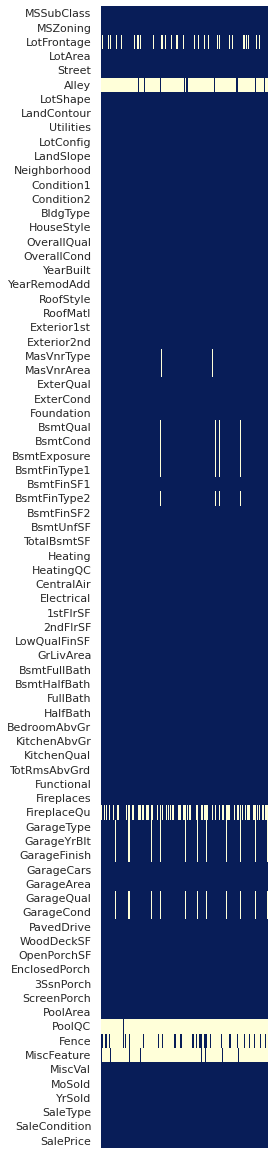

In [6]:
# Checando valores nulos
plt.figure(figsize=(3,21))
sns.heatmap(df.isnull().T, cmap="YlGnBu_r", cbar=False, xticklabels=False)

Percebemos pelo gráfico acima, que as colunas Alley, PoolQC, Fence e MiscFeature possuem seus dados quase que inteiramente preenchidos por valores NaN. A partir da documentação do dataset, percebemos que esses valores nulos representam a falta de algo, por exemplo, o valor nulo na coluna Fence representa que não existe cercas naquela casa. Assim, podemos inserir zero no lugar dos valores NA par manter a coluna.

Basicamente, essa análise serve para todos os outros valores nulos presentes no dataset. Portanto, vamos preencher todos os NAs com zero.

In [7]:
# Inserindo 0 no lugar dos NaN
df.fillna(0, inplace=True)

<AxesSubplot:>

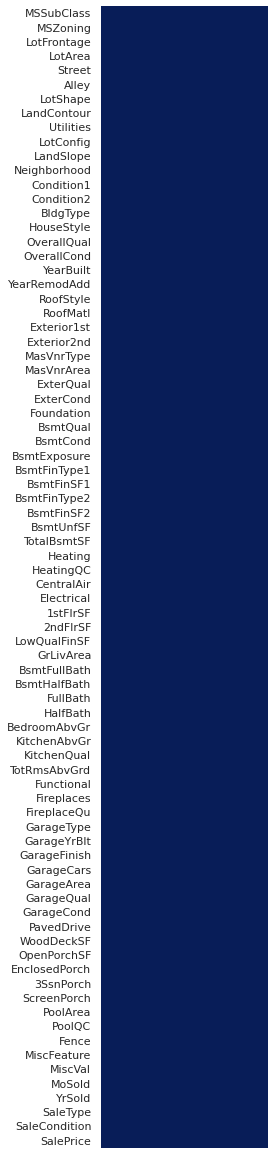

In [8]:
# Checando a inserção de valores
plt.figure(figsize=(3,21))
sns.heatmap(df.isnull().T, cmap="YlGnBu_r", cbar=False, xticklabels=False)

Em seguida, vamos transformar as variáveis categóricas em variáveis númericas para utilizar na Regressão Linear.

In [9]:
# Função do pandas get_dummies para transformar as variáveis categóricas
df_numerical = pd.get_dummies(df)

## Split dos dados

Vamos dividir os nossos dados de forma a testar como nossos modelos se comportam em dados reais fora da amostra de treino. Em seguida, padronizamos nossos dados de forma que todas as variáveis estejam na mesma escala

In [10]:
# Dividindo os dados em X e y
target = 'SalePrice'

# Variáveis preditoras
X = df_numerical.drop(target, axis=1).copy()

# Variável que queremos prever
# o log10 é utilizado para transformar os dados distorcidos em uma distribuição normal
#y = df_numerical[target]
y = np.log10(df_numerical[target])

In [11]:
# Dividindo em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
# Cria um padronizador para os dados de acordo com os dados de treino
scaler = StandardScaler().fit(X_train)

# Padroniza os dados de treino e de teste
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Regressão Linear

In [13]:
# Especifica o modelo
linear_model = LinearRegression()

# Ajusta o modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Calcula as predições do modelo de treino
predictions_train = linear_model.predict(X_train)

# Erro do modelo com dados de treino
np.sqrt(mean_squared_error(y_train, predictions_train))

0.03727436178264713

In [15]:
# Calcula as predições com os dados de teste
predictions_test = linear_model.predict(X_test)

# Erro do modelo com dados de teste
linear_error = np.sqrt(mean_squared_error(y_test, predictions_test))
linear_error

319464667278.9477

Comparando os dois erros acima percebemos que ao tentar prever o SalePrice nos dados de teste, o erro se torna gisgantesco, o que não acontece nos dados de treino, percebemos claramente um overfitting dos dados. Em outras palavras, o modelo se ajustou muito as relações existentes no treino e ao receber as informações das variáveis preditoras nos dados de testes o desempenho foi afetado.

## Regularização Lasso ou L1

Na Regularização Lasso, temos o parâmetro `alpha` como método de penalização que zera os coeficientes, podemos conferir o efeito dele sobre o resultado.

In [16]:
# Instancia o modelo
alphas_lasso = [0.000005, 0.001 , 0.1, 0.5, 1]
error_lasso = []
for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha,max_iter=10000)
    lasso_model.fit(X_train, y_train)
    prediction_lasso = lasso_model.predict(X_test)
    error_lasso.append(np.sqrt(mean_squared_error(y_test, prediction_lasso)))

In [17]:
error_lasso

[0.060237024628829156,
 0.0566804071781868,
 0.16008137698956149,
 0.1892093794864162,
 0.1892093794864162]

Podemos conferir no gráfico como o parâmetro alpha altera o valor dos eros na regressão

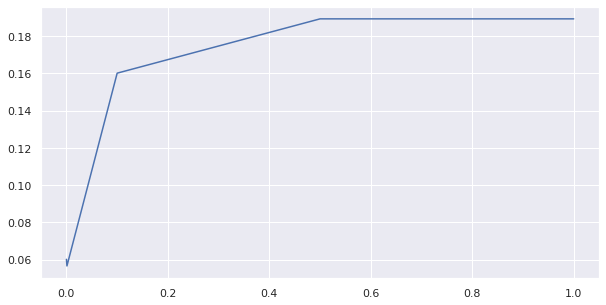

In [18]:
plt.figure(figsize=(10,5))
plt.plot(alphas_lasso, error_lasso)

In [19]:
len(lasso_model.coef_[lasso_model.coef_ == 0.00])

304

Observamos como o método Lasso zerou mais de 300 coeficientes, fazendo uma seleção de atributos

## Regularização Ridge ou L2

Na Regularização Ridge, temos o parâmetro alpha, que é o lambda, ou o método de penalização que ajusta os coeficientes. Vamos ver o efeito dele sobre o resultado.

In [20]:
alphas_ridge = [0.1, 0.5, 1, 3, 5, 10, 100, 300, 400]
error_ridge = []
for alpha in alphas_ridge:
    lm_ridge = Ridge(alpha=alpha)
    lm_ridge.fit(X_train, y_train)
    pre_ridge = lm_ridge.predict(X_test)
    error_ridge.append(np.sqrt(mean_squared_error(y_test, pre_ridge)))

In [21]:
error_ridge

[0.06084290336695957,
 0.06074491592553907,
 0.060671004754541374,
 0.060493613794268944,
 0.06038171110444227,
 0.06019133741099,
 0.05961466264354237,
 0.06079594416457446,
 0.061497159420174065]

Podemos ver no gráfico abaixo o efeito do prâmetro lambda sobre os resultados da regressão. O valor do erro cai até um ponto e depois passa a subir

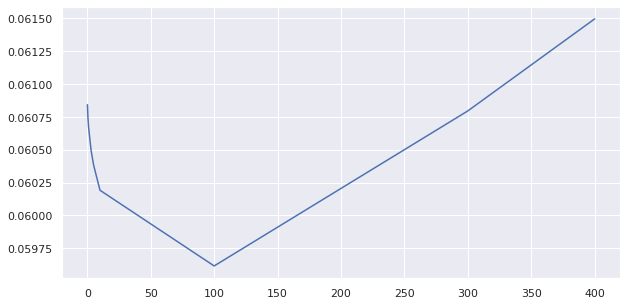

In [22]:
plt.figure(figsize=(10,5))
plt.plot(alphas_ridge, error_ridge)

In [23]:
len(lm_ridge.coef_[lm_ridge.coef_ == 0])

6

Veja que o método Ridge não zera quase nenhum coeficiente, mantendo todos eles no módelo

## Conclusão

Podemos observar como a regularização reduziu os erros, ajustando a função adequadamente e evitando o overfitting que ocorreu na regressão linear, além de tornar o modelo mais simples. 